Identify the list of candidate words using Trie structure for the misspelled word. Find the minimum
edit distance and choose the correct word based on the context.\
INPUT:\
"During the summer we have the best ueather.", "I have a black ueather jacket, so nice."\
OUTPUT:\
"During the summer we have the best weather.", "I have a black leather jacket, so nice."\
Use the developed model to choose the correct spellings for the following sentences:
1. Mr Patrick is our new (principle/principal).
2. The company (excepted/accepted) all the terms.
3. Please don’t keep your dog on the (lose/loose).
4. The (later/latter) is my best friend.
5. I need some (stationary/stationery) products for my craftwork.
6. The actor (excepted/accepted) the Oscar.
7. I will call you (later/latter) in the evening.
8. Covid (affects/effects) the lungs.
9. The (council/counsel) of the ministers were sworn in yesterday.
10. Robert (too/to) wants to accompany us to the park.
11. Mia will (council/counsel) me about choosing fashion as my career.
12. The (bear/bare) at the zoo was very playful.
13. The sheep have a lot of (fur/far) that keeps them warm.
14. The hot spring is at the (furthest/ farthest) corner of the street.
15. Can you (advice/advise) me on how to study for exams?
16. The team will (loose/lose) the match if they don’t play well.
17. Can you go (to/too) the market for me?
18. The teachers asked the students to keep (quite/quiet).
19. The (heap/hip) of garbage should be cleaned immediately.
20. This is (there/their) house.

In [2]:
import nltk
from nltk import ngrams

from nltk.probability import FreqDist, ConditionalFreqDist

#corpus for words and sentences
from nltk.corpus import brown, movie_reviews, reuters

In [3]:
nltk.download("movie_reviews")
nltk.download("reuters")
nltk.download('brown')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/smruthi/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package reuters to /home/smruthi/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package brown to /home/smruthi/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [4]:
movie_reviews.sents()

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

In [5]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [6]:
ques_data = ["Mr Patrick is our new principle",
            "The company excepted all the terms",
            "Please don't keep your dog on the lose",
            "The later is my best friend",
            "I need some stationary products for my craftwork",
            "The actor excepted the Oscar",
            "I will call you later in the evening",
            "Covid affects the lungs",
            "The council of the ministers were sworn in yesterday",
            "Robert too wants to accompany us to the park",
            "Mia will council me about choosing fashion as my career", 
            "The bear at the zoo was very playful",
            "The sheep have a lot of fur that keeps them warm",
            "The hot spring is at the furthest corner of the street",
            "Can you advice me on how to study for exams",
            "The team will loose the match if they don't play well",
            "Can you go to the market for me"
            ,"The teachers asked the students to keep quite", 
            "The heap of garbage should be cleaned immediately",
            "This is there house",
            "Mr Patrick is our new principal",
            "The company accepted all the terms",
            "Please don't keep your dog on the loose",
            "The latter is my best friend",
            "I need some stationery products for my craftwork",
            "The actor accepted the Oscar",
            "I will call you later in the evening",
            "Covid affects the lungs",
            "The council of the ministers were sworn in yesterday",
            "Robert too wants to accompany us to the park",
            "Mia will counsel me about choosing fashion as my career", 
            "The bear at the zoo was very playful",
            "The sheep have a lot of fur that keeps them warm",
            "The hot spring is at the farthest corner of the street",
            "Can you advise me on how to study for exams",
            "The team will lose the match if they don't play wel.",
            "Can you go to the market for me",
            "The teachers asked the students to keep quiet", 
            "The heap of garbage should be cleaned immediately",
            "This is their house","Mr Patrick is our new principal",
            "The company accepted all the terms",
            "Please don't keep your dog on the loose",
            "The latter is my best friend",
            "I need some stationery products for my craftwork",
            "The actor accepted the Oscar",
            "I will call you later in the evening",
            "Covid affects the lungs",
            "The council of the ministers were sworn in yesterday",
            "Robert too wants to accompany us to the park",
            "Mia will counsel me about choosing fashion as my career", 
            "The bear at the zoo was very playful",
            "The sheep have a lot of fur that keeps them warm",
            "The hot spring is at the farthest corner of the street",
            "Can you advise me on how to study for exams",
            "The team will lose the match if they don't play well",
            "Can you go to the market for me",
            "The teachers asked the students to keep quiet", 
            "The heap of garbage should be cleaned immediately",
            "This is their house"]


why is the same data point taken multiple times

In [7]:
len(ques_data)

60

In [8]:
ques_data.extend(ques_data)
len(ques_data)

120

In [9]:
ques_words = []
for i in ques_data:
    ques_words.extend(i.split())

In [10]:
len(ques_words)

948

In [11]:
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return n_grams

In [12]:
def build_ngram_model(tokens,n):
    n_grams = generate_ngrams(tokens, n)
    if n == 3:
        conditional_pairs = (((w0,w1),w2) for w0,w1,w2 in n_grams)
    if n == 2:
        conditional_pairs = n_grams
    return nltk.ConditionalFreqDist(conditional_pairs)

These are bigrams

In [13]:
sample = ngrams("This is my hobby", 2)

#print to see ngram
print(list(sample))

[('T', 'h'), ('h', 'i'), ('i', 's'), ('s', ' '), (' ', 'i'), ('i', 's'), ('s', ' '), (' ', 'm'), ('m', 'y'), ('y', ' '), (' ', 'h'), ('h', 'o'), ('o', 'b'), ('b', 'b'), ('b', 'y')]


In [14]:
nltk.ConditionalFreqDist(sample)

<ConditionalFreqDist with 0 conditions>

These are trigrams

In [15]:
sample = ngrams("This is my hobby", 3)

#print to see ngram
print(list(sample))

[('T', 'h', 'i'), ('h', 'i', 's'), ('i', 's', ' '), ('s', ' ', 'i'), (' ', 'i', 's'), ('i', 's', ' '), ('s', ' ', 'm'), (' ', 'm', 'y'), ('m', 'y', ' '), ('y', ' ', 'h'), (' ', 'h', 'o'), ('h', 'o', 'b'), ('o', 'b', 'b'), ('b', 'b', 'y')]


A conditional frequency distribution is a collection of frequency distributions for a sequence of items. Each item has its own frequency distribution, which is conditioned on the item's context.

In [16]:
conditional_pairs = [('A', '1'), ('A', '2'), ('A', '1'), ('B', '1'), ('B', '2'), ('B', '2')]
cfd = nltk.ConditionalFreqDist(conditional_pairs)

# This will print the frequency of '1' given 'A'
print(cfd['A']['1']) 

# This will print the frequency of '2' given 'B'
print(cfd['B']['2'])

2
2


In [41]:
def predict_next_word(model, context, word):
    
    context_tuple = tuple(context.split())
    # print(f"context.split : {context.split()}")
    
    if context_tuple in model and word in model[context_tuple]:
        # print(f"model : {model[context_tuple]} and word : {word}")
        # print(f"model[context_tuple].freq(word) : {model[context_tuple].freq(word)}")
        return model[context_tuple].freq(word)
    else:
        return 0.0

In [19]:
vocab = brown.words() + movie_reviews.words() + reuters.words() + ques_words
print(len(vocab))  

4466861


## Model

In [20]:
tri_model = build_ngram_model(vocab, 3)

In [21]:
bi_model = build_ngram_model(vocab, 2)

In [22]:
bi_model['to']

FreqDist({'the': 8637, 'be': 5993, 'a': 2487, 'make': 1372, 'see': 1161, 'do': 1126, 'have': 1040, 'get': 989, 'take': 851, 'his': 736, ...})

In [24]:
bi_model['accompany']

FreqDist({'us': 6, 'him': 4, 'her': 4, 'the': 3, 'his': 3, 'Nakasone': 2, 'family': 1, 'torn': 1, '"': 1, '.': 1, ...})

In [30]:
tri_model[('to','the')]

FreqDist({'U': 131, 'film': 93, 'dollar': 75, 'point': 71, 'Soviet': 63, 'United': 63, 'public': 59, 'end': 52, 'company': 45, 'world': 43, ...})

In [27]:
tri_model[('to','the')]['point']

71

In [25]:
tri_model[('to','the')].freq('point')

0.008220446914437884

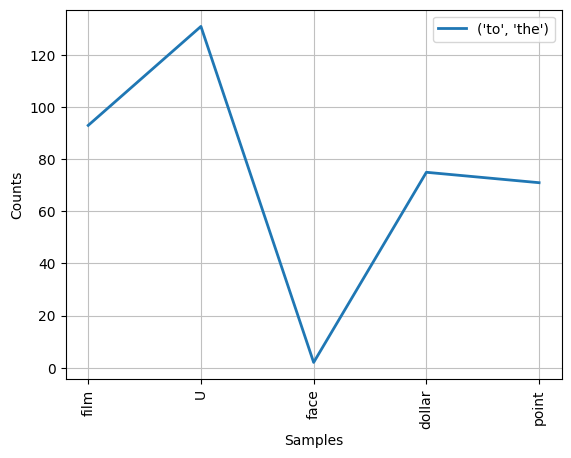

In [33]:
tri_model.plot(conditions=[("to","the")],
               samples = ['film',"U" ,'face',"dollar","point"] );

getting the most common words

In [34]:
tri_model[("to","the")].most_common(3)

[('U', 131), ('film', 93), ('dollar', 75)]

## Next token prediction

In [35]:
tri_model[("our","new")]

FreqDist({'principal': 4, 'principle': 2, 'view': 1, 'presses': 1, 'Junior': 1, 'pool': 1, 'carts': 1, 'space': 1, 'plant': 1, 'bosom': 1, ...})

In [38]:
context = "our new"
word1 = "principal"
word2 = "principle"

cfd1 = predict_next_word(tri_model, context, word1)
cfd2 = predict_next_word(tri_model, context, word2)

if cfd1 > cfd2:
    print(f"{context} {word1}")
else :
    print(f"{context} {word2}")

context.split : ['our', 'new']
model : <FreqDist with 13 samples and 17 outcomes> and word : principal
model[context_tuple].freq(word) : 0.23529411764705882
context.split : ['our', 'new']
model : <FreqDist with 13 samples and 17 outcomes> and word : principle
model[context_tuple].freq(word) : 0.11764705882352941
our new principal


In [39]:
contexts = [
    "our new",
    "The company",
    "on the",
    "need some",
    "The actor",
    "call you",
    "Mia will",
    "lot of",
    "at the",
    "Can you",
    "team will",
    "you go",
    "to keep",
    "This is"
]

word_options_list = [
    ["principal", "principle"],
    ["excepted", "accepted"],
    ["lose", "loose"],
    ["stationary", "stationery"],
    ["excepted", "accepted"],
    ["later", "latter"],
    ["council","counsel"],
    ["council","counsel"],
    ["fur", "far"],
    ["furthest", "farthest"],
    ["advice", "advise"],
    ["loose", "lose"],
    ["to", "too"],
    ["quite", "quiet"],
    ["there","their"]
]

In [43]:
for context, word_options in zip(contexts, word_options_list):
    cfd1 = predict_next_word(tri_model, context, word_options[0])
    cfd2 = predict_next_word(tri_model, context, word_options[1])
    
    if cfd1 > cfd2:
        print(f"{context} {word_options[0]}")
    else :
        print(f"{context} {word_options[1]}")

our new principal
The company accepted
on the loose
need some stationery
The actor accepted
call you later
Mia will counsel
lot of counsel
at the far
Can you farthest
team will advise
you go lose
to keep to
This is quiet
